# Data Analyst - Technical Task Go1
## Mohanad Al-Abiad
##

## Libraries 

In [1]:
import pandas as pd
import matplotlib.pylab as plt

## Get & prepare Data

In [2]:
dim_lo = pd.read_csv("")
new_lmdd = pd.read_csv("")
old_lmd = pd.read_csv("")

dim_lo_premium = dim_lo[dim_lo['cp_is_premium'] == True]

In [3]:
dim_lo = dim_lo[['lo_id', 
      # 'lo_language', 'lo_is_english', 
      # 'lo_type',
      # 'lo_duration_in_minutes'!!!, 
      # 'lo_year_created', 'lo_launch_behaviour', 'lo_has_compliance_topic', 'lo_created_ts', 'lo_updated_ts',
      # 'lo_decommissioned_ts', 'lo_topic_name', 
        'cp_is_premium',
        'cp_portal_id']].copy()

In [4]:
dim_lo_premium = dim_lo_premium[['lo_id', 
      # 'lo_language', 'lo_is_english', 
      # 'lo_type',
      # 'lo_duration_in_minutes'!!!, 
      # 'lo_year_created', 'lo_launch_behaviour', 'lo_has_compliance_topic', 'lo_created_ts', 'lo_updated_ts',
      # 'lo_decommissioned_ts', 'lo_topic_name', 
        'cp_is_premium',
        'cp_portal_id']].copy()

In [5]:
dim_lo = dim_lo.rename(columns={
                         'lo_id':'LO_ID', 
                         'lo_language':'LO_Language', 
                         'lo_is_english':'LO_Is_English', 
                         'lo_type':'LO_Type',
                         'lo_duration_in_minutes':'LO_Duration_In_Minutes', 
                         'cp_is_premium':'CP_Is_Premium', 
                         'cp_portal_id':'CP_Portal_ID'
                         })

dim_lo_premium = dim_lo_premium.rename(columns={
                         'lo_id':'LO_ID', 
                         'lo_language':'LO_Language', 
                         'lo_is_english':'LO_Is_English', 
                         'lo_type':'LO_Type',
                         'lo_duration_in_minutes':'LO_Duration_In_Minutes', 
                         'cp_is_premium':'CP_Is_Premium', 
                         'cp_portal_id':'CP_Portal_ID'
                         })

new_lmdd = new_lmdd.rename(columns={
                         'activity_date':'Activity_Date', 
                         'enrolment_id':'Enrolment_ID', 
                         'lo_id':'LO_ID',
                         'learning_minutes_capped_new':'Learning_Minutes_Capped_New'
                         })

old_lmd = old_lmd.rename(columns={
                         'activity_month':'Activity_Month', 
                         'lo_id':'LO_ID', 
                         'learning_minutes_capped_old':'Learning_Minutes_Capped_Old'
                         })

In [6]:
# Convert 'Activity_Date' in new_lmdd DataFrame to a monthly period
new_lmdd['Activity_Month'] = pd.to_datetime(new_lmdd['Activity_Date']).dt.to_period('M')

# Aggregate the new_lmdd data by 'LO_ID' and 'Activity_Month', summing up 'Learning_Minutes_Capped_New'
new_lmdd = new_lmdd.groupby(['LO_ID', 'Activity_Month']).agg({
    'Learning_Minutes_Capped_New': 'sum'
}).reset_index()

# Convert 'Activity_Month' in old_lmd DataFrame to a monthly period 
old_lmd['Activity_Month'] = pd.to_datetime(old_lmd['Activity_Month']).dt.to_period('M')

# Merging the old_lmd and new_lmdd DataFrames on 'LO_ID' and 'Activity_Month'
# Perform an inner join
merged_data = pd.merge(
    old_lmd, 
    new_lmdd, 
    on=['Activity_Month', 'LO_ID'], 
    how='inner'
)

### Anomaly Detection (Old vs New Calculation)

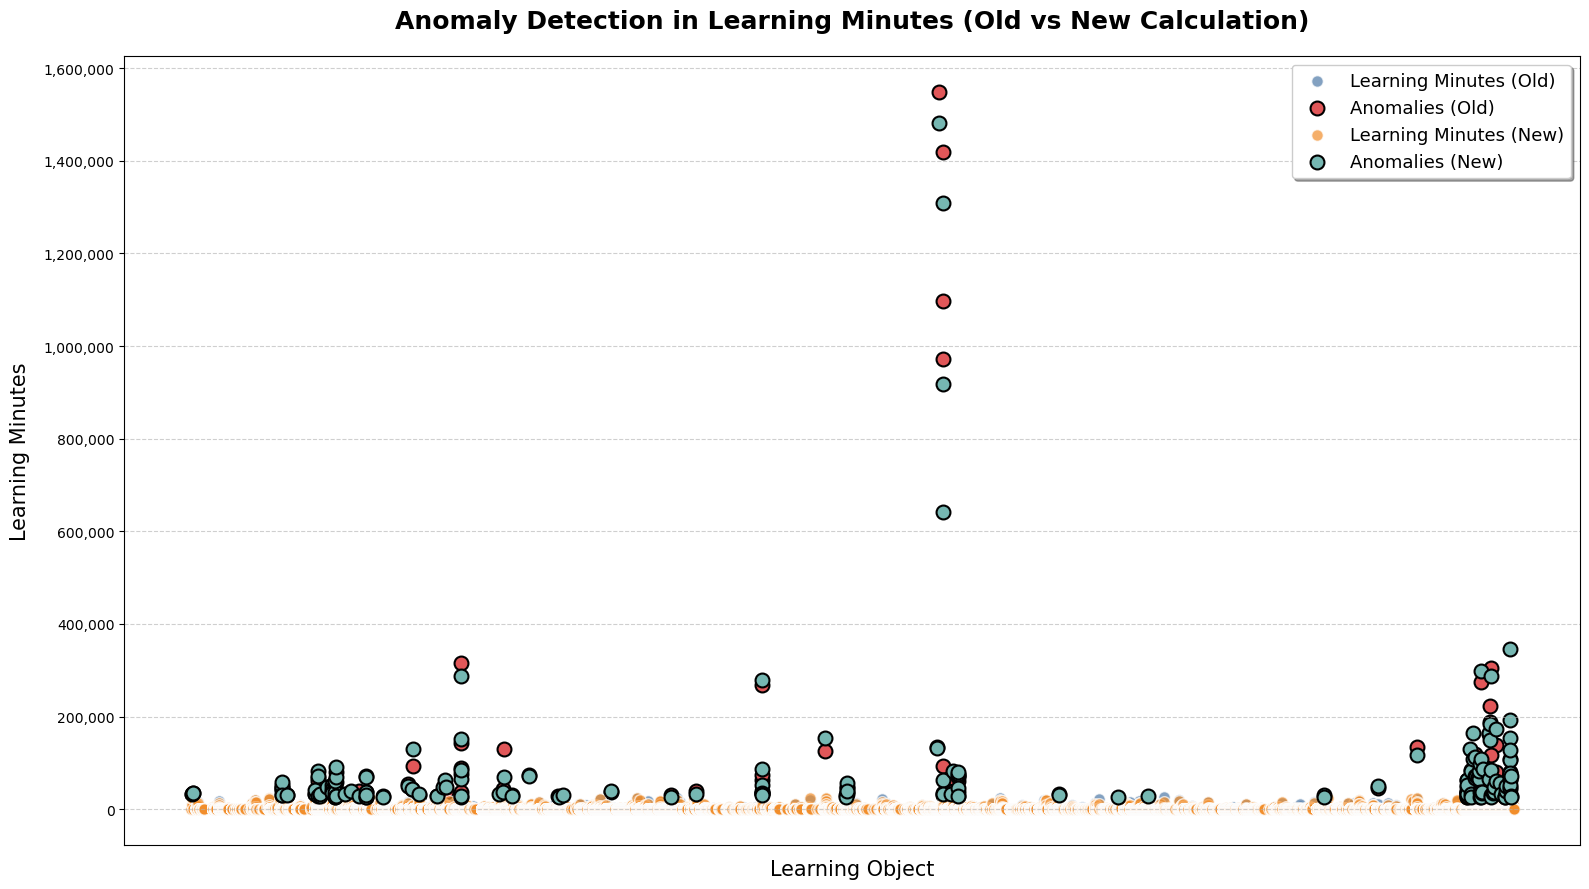

In [8]:
# Function to calculate Z-scores and identify anomalies
def prepare_data(df, col_name):
    if df['Activity_Month'].dtype == 'period[M]':
        df['Activity_Month'] = df['Activity_Month'].dt.to_timestamp()
    df['Z-score'] = (df[col_name] - df[col_name].mean()) / df[col_name].std()
    df['Anomaly'] = df['Z-score'].abs() > 3
    return df

# Prepare data
old_lmd = prepare_data(old_lmd, 'Learning_Minutes_Capped_Old')
new_lmdd = prepare_data(new_lmdd, 'Learning_Minutes_Capped_New')

# Plotting function
plt.figure(figsize=(16, 9))

def plot_data(df, col_name, normal_color, anomaly_color, label_normal, label_anomaly):
    plt.scatter(df['LO_ID'], df[col_name], color=normal_color, label=label_normal, alpha=0.7, edgecolor='white', s=70)
    plt.scatter(df[df['Anomaly']]['LO_ID'], df[df['Anomaly']][col_name], color=anomaly_color, label=label_anomaly, s=100, edgecolor='black', linewidth=1.5)

# Plot old and new data
plot_data(old_lmd, 'Learning_Minutes_Capped_Old', '#4e79a7', '#e15759', 'Learning Minutes (Old)', 'Anomalies (Old)')
plot_data(new_lmdd, 'Learning_Minutes_Capped_New', '#f28e2b', '#76b7b2', 'Learning Minutes (New)', 'Anomalies (New)')

# Add title, labels, and layout adjustments
plt.title('Anomaly Detection in Learning Minutes (Old vs New Calculation)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Learning Object', fontsize=15, labelpad=10)
plt.ylabel('Learning Minutes', fontsize=15, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=13, loc='upper right', frameon=True, shadow=True, fancybox=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().xaxis.set_ticks([])
plt.tight_layout()

plt.show()

## What is the overall difference in learning minutes?

In [9]:
merged_data['Minute_Difference'] = merged_data['Learning_Minutes_Capped_New'] - merged_data['Learning_Minutes_Capped_Old']

In [10]:
total_difference = merged_data['Minute_Difference'].sum()
print(f"The total difference in learning minutes is: {total_difference}")

The total difference in learning minutes is: -2069518.5117825351


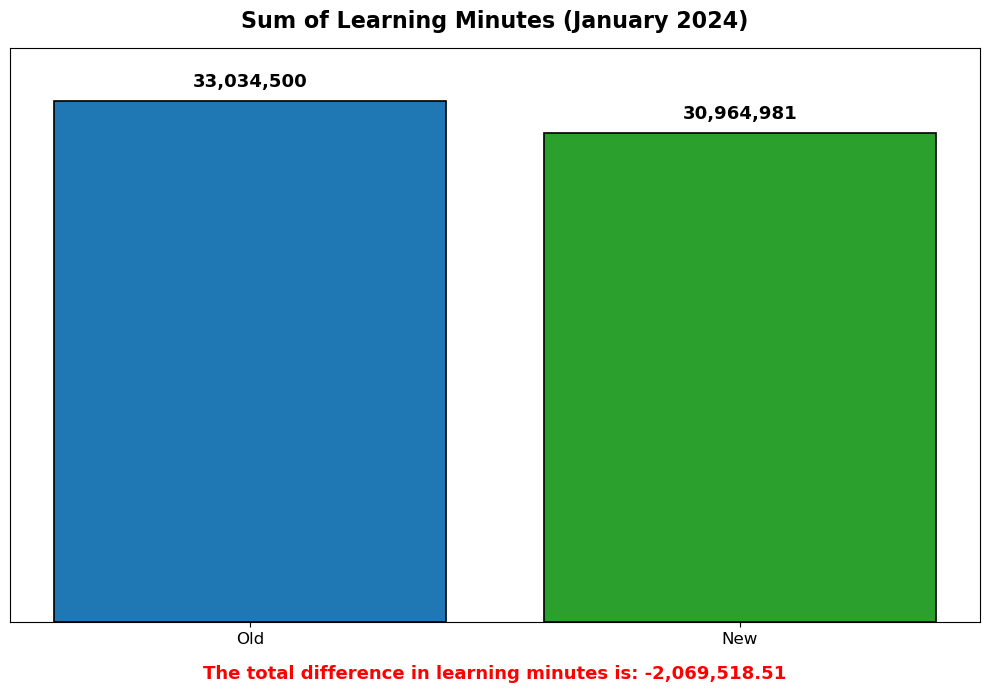

In [11]:
# Calculate the sums for the old and new learning minutes
sum_old = merged_data['Learning_Minutes_Capped_Old'].sum()
sum_new = merged_data['Learning_Minutes_Capped_New'].sum()

# Store the sums in a dictionary for visualization
sums = {'Old': sum_old, 'New': sum_new}

# Text for the difference information
difference_text = "The total difference in learning minutes is: -2,069,518.51"

# Create the figure and bar chart
plt.figure(figsize=(10, 7))
bars = plt.bar(sums.keys(), sums.values(), color=['#1f77b4', '#2ca02c'], edgecolor='black', linewidth=1.2)

# Title and axis labels
plt.title('Sum of Learning Minutes (January 2024)', fontsize=16, fontweight='bold', pad=15)
plt.xticks(fontsize=12)
plt.yticks([])  
plt.ylim(0, max(sums.values()) * 1.1)

# Annotate the bar chart with the sum values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + max(sums.values()) * 0.02, 
             f'{yval:,.0f}', ha='center', va='bottom', fontsize=13, fontweight='bold', color='black')

# Add the total difference text at the bottom of the chart
plt.text(0.5, -0.1, difference_text, ha='center', fontsize=13, color='red', fontweight='bold', transform=plt.gca().transAxes)

# Optimize layout adjustments
plt.tight_layout()

plt.show()

## How many Partners will be impacted by the new calculation?

In [12]:
# Merge merged_data with dim_lo and create a DataFrame merged_data_with_meta
merged_data_with_meta = pd.merge(
    merged_data, 
    dim_lo[['LO_ID', 'CP_Portal_ID', 'CP_Is_Premium']], 
    left_on='LO_ID', 
    right_on='LO_ID', 
    how='left'
)

# Filter the impacted partners and premium partners
impacted_partners = merged_data_with_meta[merged_data_with_meta['Minute_Difference'] != 0]
impacted_premium_partners = impacted_partners[impacted_partners['CP_Is_Premium'] == True]

# Count the number of unique impacted partners and premium partners
num_impacted_partners = impacted_partners['CP_Portal_ID'].nunique()
num_impacted_premium_partners = impacted_premium_partners['CP_Portal_ID'].nunique()

# Output the results
print(f"Number of impacted partners: {num_impacted_partners}")
print(f"Number of impacted premium partners: {num_impacted_premium_partners}")

Number of impacted partners: 352
Number of impacted premium partners: 352


## Who are the most impacted ones? By how much?

In [13]:
# Sums 'Minute_Difference' by 'CP_Portal_ID'
partner_impact = merged_data_with_meta.groupby('CP_Portal_ID').agg({
    'Minute_Difference': 'sum'
}).reset_index()

In [14]:
# Gets top 10 most negatively impacted partners
negatively_impacted = partner_impact.sort_values(by='Minute_Difference', ascending=True).head(352)
most_negatively_impacted = partner_impact.sort_values(by='Minute_Difference', ascending=True).head(10)
print("The most negatively affected partners:")
print(most_negatively_impacted)

The most negatively affected partners:
     CP_Portal_ID  Minute_Difference
52        6677040     -857792.941085
172      20835942     -723335.270081
70        8874551     -258205.228658
233      36171405     -108621.512161
29        4546598      -77471.353524
89        9853789      -64069.954689
171      20521249      -59803.820149
107      10895686      -58278.389355
144      13882707      -57160.171965
17        3802641      -53005.093915


In [15]:
# Gets top 10 most positively impacted partners
positively_impacted = partner_impact.sort_values(by='Minute_Difference', ascending=False).head(352)
most_positively_impacted = partner_impact.sort_values(by='Minute_Difference', ascending=False).head(10)
print("The most positively affected partners:")
print(most_positively_impacted)

The most positively affected partners:
     CP_Portal_ID  Minute_Difference
35        5123906      208510.746823
33        4774631      160387.679801
39        5725320      135639.518499
163      18258444      127189.677907
151      16113065       85959.718855
169      19475035       44827.729543
238      36176790       44258.253292
147      14335393       40124.228578
27        4256085       36960.284578
20        3988776       34879.378502


In [16]:
# Filter by Minute_Difference < 0 and count CP_Portal_IDs
negatively_impacted_count = partner_impact[partner_impact['Minute_Difference'] < 0]['CP_Portal_ID'].count()
print("Count of CP_Portal_IDs with negative Minute_Difference:")
print(negatively_impacted_count)

# Filter by Minute_Difference > 0 and count CP_Portal_IDs
positively_impacted_count = partner_impact[partner_impact['Minute_Difference'] > 0]['CP_Portal_ID'].count()
print("Count of CP_Portal_IDs with positive Minute_Difference")
print(positively_impacted_count)

Count of CP_Portal_IDs with negative Minute_Difference:
186
Count of CP_Portal_IDs with positive Minute_Difference
166


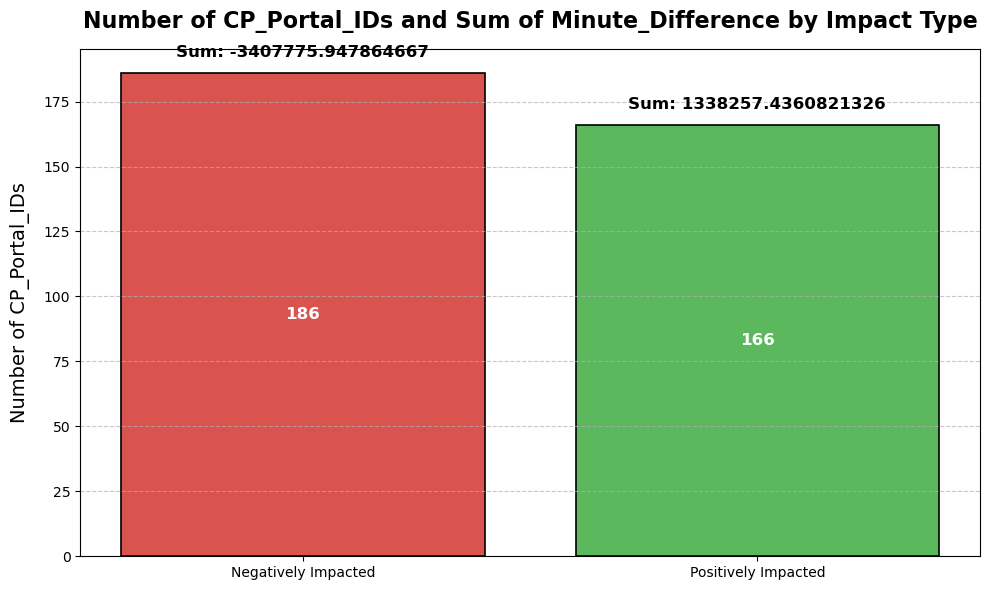

In [17]:
# Calculate sums for negatively and positively impacted partners
negative_sum = negatively_impacted.loc[negatively_impacted['Minute_Difference'] < 0, 'Minute_Difference'].sum()
positive_sum = positively_impacted.loc[positively_impacted['Minute_Difference'] > 0, 'Minute_Difference'].sum()

# Data for plotting
categories = ['Negatively Impacted', 'Positively Impacted']
counts = [negatively_impacted_count, positively_impacted_count]
sums = [negative_sum, positive_sum]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['#d9534f', '#5cb85c'], edgecolor='black', linewidth=1.2)

# Annotate bars with counts and sums
for bar, count, sum_value in zip(bars, counts, sums):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{count}', ha='center', va='center', fontsize=12, fontweight='bold', color='white')
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'Sum: {sum_value}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.ylabel('Number of CP_Portal_IDs', fontsize=14, labelpad=10)
plt.title('Number of CP_Portal_IDs and Sum of Minute_Difference by Impact Type', fontsize=16, pad=15, fontweight='bold')

# Customize layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Who are the Partners potentially at risk of complaints?

In [18]:
negatively_impacted_partners = partner_impact[partner_impact['Minute_Difference'] < 0]

In [19]:
at_risk_partners = negatively_impacted_partners.sort_values(by='Minute_Difference', ascending=True).head(10)
print("Partners potentially affected by complaints")
print(at_risk_partners)

Partners potentially affected by complaints
     CP_Portal_ID  Minute_Difference
52        6677040     -857792.941085
172      20835942     -723335.270081
70        8874551     -258205.228658
233      36171405     -108621.512161
29        4546598      -77471.353524
89        9853789      -64069.954689
171      20521249      -59803.820149
107      10895686      -58278.389355
144      13882707      -57160.171965
17        3802641      -53005.093915
